## 1. Import Dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df_1 = pd.read_csv("../data/House_data.csv")
df_1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## 2. General Exploration

In [4]:
# get shape of data
print("Columns:",df_1.shape[1])
print("Rows:",df_1.shape[0])

Columns: 9
Rows: 13320


In [5]:
# get general info data
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
# get amount of null value from data
df_1.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
# get unique value for each columns
for col in df_1.columns:
    print("unique value of", col)
    print(df_1[col].unique(), "\n")

unique value of area_type
['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area'] 

unique value of availability
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul'] 

unique value of location
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross sriniv

In [8]:
print("Summary of Unique Value:")
print(df_1.nunique())

Summary of Unique Value:
area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64


In [9]:
# display statistics for numeric value
df_1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


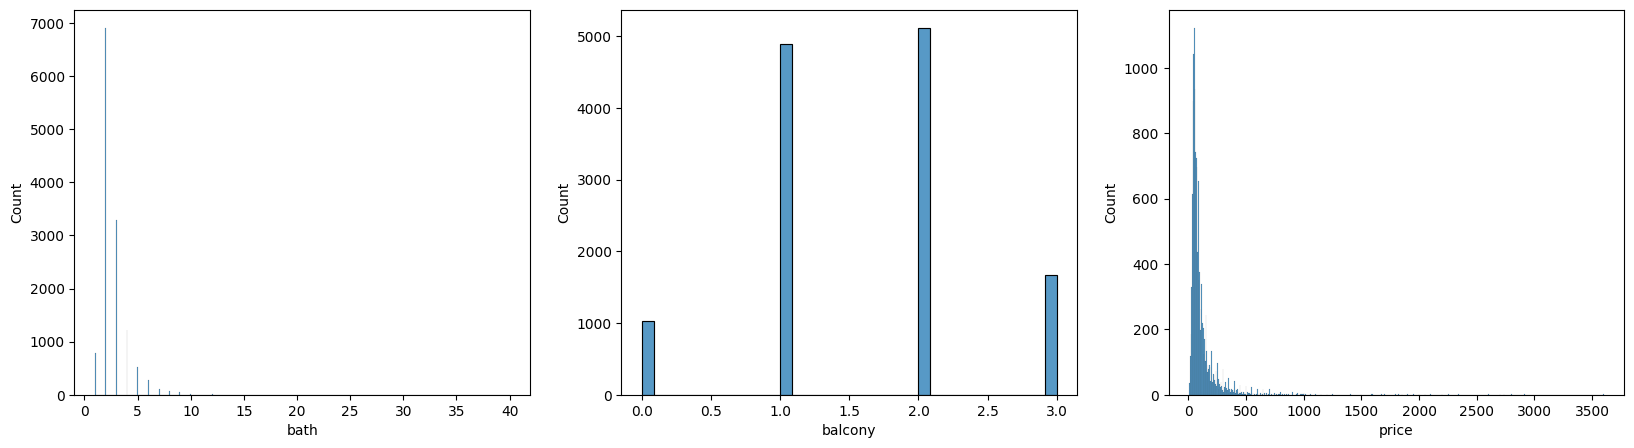

In [10]:
# Visualize/plot numeric value
numeric = [x for x in df_1.columns if df_1[x].dtype == "float64"]
fig = plt.figure(figsize=(20,17))
for i, var in enumerate(numeric):
    plt.subplot(3,3,i+1)
    sns.histplot(data = df_1, x = var)

plt.show()

## 3. Data Preparation

### 3.1 Drop Column

In [11]:
# Drop some column that maybe not esessential for the model

df_2 = df_1.drop(columns = ["availability", "society", "area_type"])
df_2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


### 3.2 Handle Missing Value

In [12]:
# Handle Nan Value with mode
for col in df_2.columns:
    df_2[col] = df_2[col].fillna(df_2[col].mode()[0])

In [13]:
df_2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

### 3.3 Convert Type of Size and Total Square Feet Columns

In [14]:
df_2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [15]:
# look at size column
'''
from data exploration, it contains total of rooms in the house, assume Bedroom and BHK(bedroom hall and kitchen) is the 
same thing, so we just need the number 
'''

df_2['size'] = df_2['size'].apply(lambda x: float(x.split(' ')[0]))


In [16]:
df_2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Kothanur,2.0,1200,2.0,1.0,51.00


In [17]:
# rename size column
df_2.rename(columns={"size": "bedroom"},inplace = True)

In [18]:
# Look at total_squarefeet column 
'''
from data exploration, we can see that total_sqft contains range value so the value of the column become object instead 
of float64/number
'''
df_2["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def is_float(x):
    '''
    this function will check, if the value of x can be represented as float then return true otherwise return false
    '''
    try:
        float(x)
    except:
        return False
    
    return True

In [20]:
df_2[~(df_2['total_sqft'].apply(is_float))]

,location,bedroom,total_sqft,bath,balcony,price
30,Yelahanka,4.0,2100 - 2850,4.0,0.0,186.000
56,Devanahalli,4.0,3010 - 3410,2.0,2.0,192.000
81,Hennur Road,4.0,2957 - 3450,2.0,2.0,224.500
122,Hebbal,4.0,3067 - 8156,4.0,0.0,477.000
137,8th Phase JP Nagar,2.0,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...
12990,Talaghattapura,3.0,1804 - 2273,3.0,0.0,122.000
13059,Harlur,2.0,1200 - 1470,2.0,0.0,72.760
13240,Devanahalli,1.0,1020 - 1130,2.0,2.0,52.570
13265,Hoodi,2.0,1133 - 1384,2.0,0.0,59.135


In [21]:
# make converter function
def convert_sqft_to_num(x):
    '''
    the converted value is a mean between a range 
    '''
    split_val = x.split('-')
    if(len(split_val) == 2):
        return (float(split_val[0]) + float(split_val[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
# lets convert the total squarefeet column type to float/number
df_3 = df_2.copy()
df_3['total_sqft'] = df_3['total_sqft'].apply(convert_sqft_to_num)
print("Sqft column data types : ", df_3['total_sqft'].dtype)

Sqft column data types :  float64


In [23]:
df_3.tail()

,location,bedroom,total_sqft,bath,balcony,price
13315,Whitefield,5.0,3453.0,4.0,0.0,231.0
13316,Richards Town,4.0,3600.0,5.0,2.0,400.0
13317,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.0
13318,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.0
13319,Doddathoguru,1.0,550.0,1.0,1.0,17.0


In [24]:
# is that everything ok ?
df_3[df_3['total_sqft'].isna()].head()

,location,bedroom,total_sqft,bath,balcony,price
410,Kengeri,1.0,NaN,1.0,0.0,18.5
648,Arekere,9.0,NaN,9.0,2.0,265.0
775,Basavanagara,1.0,NaN,2.0,1.0,93.0
872,Singapura Village,2.0,NaN,2.0,2.0,45.0
1019,Marathi Layout,1.0,NaN,1.0,0.0,110.0


In [25]:
# wow, we got some nan value, lets observe this
df_2[df_3['total_sqft'].isna()].head()

,location,bedroom,total_sqft,bath,balcony,price
410,Kengeri,1.0,34.46Sq. Meter,1.0,0.0,18.5
648,Arekere,9.0,4125Perch,9.0,2.0,265.0
775,Basavanagara,1.0,1000Sq. Meter,2.0,1.0,93.0
872,Singapura Village,2.0,1100Sq. Yards,2.0,2.0,45.0
1019,Marathi Layout,1.0,5.31Acres,1.0,0.0,110.0


In [26]:
# in this case we drop the anomaly input in total_sqft
df_3 = df_3[~(df_3['total_sqft'].isna())]

In [27]:
df_3.isna().sum()

location      0
bedroom       0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

### 3.4 Feature Engineering

In [28]:
# lets make price per total square feet feature
# 1 lakh : 100000 Rupee
df_4 = df_3.copy()
df_4['price_per_sqft'] = df_4['price']/df_4['total_sqft']
df_4

,location,bedroom,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,0.036998
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,0.046154
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,0.043056
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,0.062459
4,Kothanur,2.0,1200.0,2.0,1.0,51.00,0.042500
...,...,...,...,...,...,...,...
13315,Whitefield,5.0,3453.0,4.0,0.0,231.00,0.066898
13316,Richards Town,4.0,3600.0,5.0,2.0,400.00,0.111111
13317,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00,0.052585
13318,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00,0.104073


In [29]:
# look location column unique value

print(f"total unique value of location:", df_4['location'].nunique())

total unique value of location: 1299


In [30]:
# there are a lot of location, so when we put in modeling with one hot encode it will becomes 1305 columns?
# let's clean up this
# Clean spacing in each value of location column
df_4['location'] = df_4['location'].apply(lambda x: x.strip()) 

In [31]:
# actually this will reduce the unique value because "[space]" is sensitive
print(f"total unique value of location:", df_4['location'].nunique())

total unique value of location: 1288


In [32]:
# let's group location by total house in dataset and see which location has a lot of house
location_stats = df_4.groupby(['location'])['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               540
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
Kanakapura Main Road       1
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
whitefiled                 1
Name: location, Length: 1288, dtype: int64

In [33]:
# how many location that has less than 10 house
location_stats[location_stats<10]

location
Gollahalli               9
Kaverappa Layout         9
Chandra Layout           9
4th Block Koramangala    9
KUDLU MAIN ROAD          9
                        ..
Kanakapura Main Road     1
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
whitefiled               1
Name: location, Length: 1034, dtype: int64

In [34]:
# we set 1040 location that has less than 10 house as "other"
location_stats_less_than_10 = location_stats[location_stats < 10]
df_4['location'] = df_4['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


In [35]:
print(f"total unique value of location:", df_4['location'].nunique())

total unique value of location: 255


In [36]:
df_4.head(10)

,location,bedroom,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,0.036998
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,0.046154
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,0.043056
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,0.062459
4,Kothanur,2.0,1200.0,2.0,1.0,51.00,0.042500
5,Whitefield,2.0,1170.0,2.0,1.0,38.00,0.032479
6,Old Airport Road,4.0,2732.0,4.0,2.0,204.00,0.074671
7,Rajaji Nagar,4.0,3300.0,4.0,2.0,600.00,0.181818
8,Marathahalli,3.0,1310.0,3.0,1.0,63.25,0.048282
9,other,6.0,1020.0,6.0,2.0,370.00,0.362745


### 3.5 Outlier Treatment

In [37]:
# assume that total square ft / bedroom the ideal value is > 200
df_5 = df_4.copy()
df_5[df_5['total_sqft']/df_5['bedroom'] < 200].head()

,location,bedroom,total_sqft,bath,balcony,price,price_per_sqft
9,other,6.0,1020.0,6.0,2.0,370.0,0.362745
45,HSR Layout,8.0,600.0,9.0,2.0,200.0,0.333333
68,Devarachikkanahalli,8.0,1350.0,7.0,0.0,85.0,0.062963
70,other,3.0,500.0,3.0,2.0,100.0,0.200000
89,Rajaji Nagar,6.0,710.0,6.0,3.0,160.0,0.225352


In [38]:
# lets remove value that less than 200
df_5 = df_5[~(df_5['total_sqft']/df_5['bedroom'] < 200)]
df_5

,location,bedroom,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,0.036998
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,0.046154
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,0.043056
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,0.062459
4,Kothanur,2.0,1200.0,2.0,1.0,51.00,0.042500
...,...,...,...,...,...,...,...
13315,Whitefield,5.0,3453.0,4.0,0.0,231.00,0.066898
13316,other,4.0,3600.0,5.0,2.0,400.00,0.111111
13317,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00,0.052585
13318,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00,0.104073


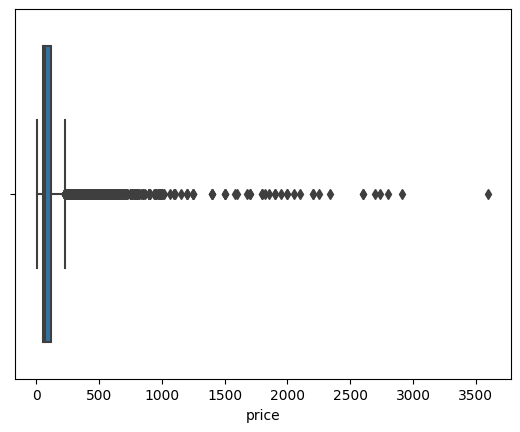

In [39]:
# check column target boxplot
sns.boxplot(data = df_5, x = 'price')
plt.show()

In [40]:
# remove price above 3500
df_5 = df_5[~(df_5['price'] > 3500)]

In [41]:
df_5['price_per_sqft'].describe()

count    12933.000000
mean         0.064879
std          0.043215
min          0.002678
25%          0.042394
50%          0.053559
75%          0.070909
max          1.764706
Name: price_per_sqft, dtype: float64

In [42]:
def outlier_removal_price_per_sqft(df):
    df_out = pd.DataFrame()
    for index, location_df in df.groupby('location'):
        m = np.mean(location_df['price_per_sqft'])
        s = np.std(location_df['price_per_sqft'])
        without_outlier = location_df[(location_df['price_per_sqft']>(m-s)) & (location_df['price_per_sqft']<(m+s))]
        df_out = pd.concat([df_out,without_outlier], ignore_index=True)
    return df_out

df_5 = outlier_removal_price_per_sqft(df_5)

In [43]:
# let say we have 2 bedroom, and the proper bathroom is 2 or 3, what if 4 it doesnt make sense right?
df_5[df_5['bath'] > (df_5['bedroom']+2)]

,location,bedroom,total_sqft,bath,balcony,price,price_per_sqft
607,BTM 1st Stage,9.0,3300.0,14.0,2.0,500.0,0.151515
1604,Chamrajpet,6.0,1500.0,9.0,3.0,230.0,0.153333
1741,Chikkabanavar,4.0,2460.0,7.0,2.0,80.0,0.032520
5545,Nagasandra,4.0,7000.0,8.0,2.0,450.0,0.064286
7093,Thanisandra,3.0,1806.0,6.0,2.0,116.0,0.064230
8851,other,6.0,11338.0,9.0,1.0,1000.0,0.088199
10078,other,6.0,1200.0,9.0,3.0,122.0,0.101667


In [44]:
df_5 = df_5[df_5['bath'] < (df_5['bedroom']+2)]

### 3.6 Convert Categorical Column

In [45]:
df_6 = df_5.copy()
df_6.head()

,location,bedroom,total_sqft,bath,balcony,price,price_per_sqft
0,1st Block Jayanagar,4.0,2850.0,4.0,1.0,428.0,0.150175
1,1st Block Jayanagar,3.0,1630.0,3.0,2.0,194.0,0.119018
2,1st Block Jayanagar,6.0,1200.0,6.0,2.0,125.0,0.104167
3,1st Block Jayanagar,3.0,1875.0,2.0,3.0,235.0,0.125333
4,1st Block Jayanagar,3.0,1200.0,2.0,0.0,130.0,0.108333


In [46]:
# location column is nominal, lets use one hot encoding
one_hot_location = pd.get_dummies(df_6['location'])
one_hot_location.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
df_7 = pd.concat([df_6.drop('location', axis = 1), one_hot_location], axis = 1)
df_7.head()

,bedroom,total_sqft,bath,balcony,price,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,4.0,2850.0,4.0,1.0,428.0,0.150175,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,1630.0,3.0,2.0,194.0,0.119018,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6.0,1200.0,6.0,2.0,125.0,0.104167,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.0,1875.0,2.0,3.0,235.0,0.125333,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3.0,1200.0,2.0,0.0,130.0,0.108333,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 3.7 Remove Duplicated

In [48]:
# Before we go to modeling section lets drop some duplicated rows in dataset
df_7.duplicated().sum()

765

In [49]:
df_7.drop_duplicates(inplace = True, ignore_index = True)
print(df_7.duplicated().sum())

0


In [50]:
df_7.shape

(9816, 261)

In [51]:
df_6.describe()

,bedroom,total_sqft,bath,balcony,price,price_per_sqft
count,10581.000000,10581.000000,10581.000000,10581.000000,10581.000000,10581.000000
mean,2.598998,1485.142751,2.469521,1.603440,90.471123,0.057342
std,0.967504,850.823461,0.987609,0.786346,83.850998,0.023942
min,1.000000,284.000000,1.000000,0.000000,8.000000,0.013793
25%,2.000000,1100.000000,2.000000,1.000000,49.000000,0.042500
50%,2.000000,1275.000000,2.000000,2.000000,67.000000,0.052000
75%,3.000000,1639.000000,3.000000,2.000000,100.000000,0.065003
max,27.000000,30400.000000,27.000000,3.000000,2200.000000,0.245098


## 4. Modeling

### 4.1 Linear Regression

In [52]:
# Split dataset
df_8 = df_7.copy()

X = df_8.drop(columns = ['price', 'price_per_sqft'])
X.head()

,bedroom,total_sqft,bath,balcony,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,4.0,2850.0,4.0,1.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,1630.0,3.0,2.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6.0,1200.0,6.0,2.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.0,1875.0,2.0,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3.0,1200.0,2.0,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
# log transform target column, avoid model predict negative result
y = np.log(df_8['price'])
y

0       6.059123
1       5.267858
2       4.828314
3       5.459586
4       4.867534
          ...   
9811    4.867534
9812    3.258097
9813    4.157789
9814    3.871201
9815    5.991465
Name: price, Length: 9816, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 15)

In [55]:
from sklearn.linear_model import LinearRegression
lineg = LinearRegression()
lineg.fit(X_train, y_train)
lineg.score(X_test, y_test)

0.7545184695294184

In [56]:
# now we do some test for our model with cross validatopn
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cross_val = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 15)
cross_val_score(LinearRegression(), X, y, cv = cross_val)

array([0.75451847, 0.69650806, 0.78147885, 0.71760359, 0.72864227])

### 4.2 Trying Different Algorithm with Grid Search CV

In [61]:
# we are using laso regression and decision tree regressor to campare with Linear regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

def find_best_algo_with_gridCV(X,y):
    # define algo and paramater
    algos = {
        'linear-regression':{
            'model': LinearRegression(),
            'params':{
                'positive': [True, False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random', 'cyclic']
            }
        },
        'decision_tree_regression':{
            'model':DecisionTreeRegressor(),
            'params': {
                'criterion':['absolute_error', 'squared_error'],
                'splitter':["best", "random"]
            }
        }
    }
    
    # compute
    scores = []
    cross_valid_ = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 15)
    for algo_name, conf in algos.items():
        gs = GridSearchCV(conf['model'], conf['params'], cv = cross_valid_, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    
    return pd.DataFrame(scores, columns = ['model', 'best_score','best_params'])
    

In [62]:
find_best_algo_with_gridCV(X,y)

,model,best_score,best_params
0,linear-regression,0.735750,{'positive': False}
1,lasso,0.527727,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree_regression,0.728619,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [64]:
# linear regression gives the best score, lets rebuild with best paramater given
from sklearn.linear_model import LinearRegression
lineg_norm = LinearRegression(positive = False)
lineg_norm.fit(X_train, y_train)
lineg_norm.score(X_test, y_test)

0.7545184695294184

In [65]:
def predict_price(bedroom, total_sqft, bath, balcony, location, model):
    location_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = bedroom
    x[1] = total_sqft
    x[2] = bath
    x[3] = balcony
    
    x[location_index] = 1
    
    return np.exp(model.predict([x])[0])
    

In [66]:
print(predict_price(2,650,3,0,'1st Block Jayanagar', lineg_norm))
print(predict_price(4,2000,5,3,'Chikka Tirupathi', lineg_norm))

137.14411046085908
108.80791633827943


D:\My Code\Project\Machine Learning\04 House Price Prediction\hindi-house-prediction\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\My Code\Project\Machine Learning\04 House Price Prediction\hindi-house-prediction\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [67]:
# Okey enough !!, i dont have any idea to improve this model anymore, lets export this model as pickel file
import pickle
with open('../result/model.pickle','wb') as f:
    pickle.dump(lineg_norm,f)

### 4.3 Load the Model on Website Later On

In [68]:
with open('../result/model.pickle' , 'rb') as f:
    model = pickle.load(f)

In [69]:
def predict_price(bedroom, total_sqft, bath, balcony, location ,df_features, model):
    location_index = np.where(df_features.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = bedroom
    x[1] = total_sqft
    x[2] = bath
    x[3] = balcony
    
    x[location_index] = 1
    
    return np.exp(model.predict([x])[0])
    

In [70]:
features_df = X[:0]
features_df.to_csv('../result/features.csv',index=False)

In [71]:
print(predict_price(2,650,3,0,'1st Block Jayanagar', features_df, model))
print(predict_price(4,2600,5,3,'Chikka Tirupathi', features_df, model))

137.14411046085908
131.13595135872555


D:\My Code\Project\Machine Learning\04 House Price Prediction\hindi-house-prediction\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\My Code\Project\Machine Learning\04 House Price Prediction\hindi-house-prediction\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [72]:
df_6[df_6['location'] == 'Chikka Tirupathi']

,location,bedroom,total_sqft,bath,balcony,price,price_per_sqft
1726,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,0.046154
1727,Chikka Tirupathi,4.0,2325.0,4.0,1.0,120.00,0.051613
1728,Chikka Tirupathi,3.0,1808.0,4.0,2.0,80.27,0.044397
1729,Chikka Tirupathi,3.0,3297.0,3.0,1.0,135.00,0.040946
1730,Chikka Tirupathi,4.0,3500.0,5.0,3.0,150.00,0.042857
1731,Chikka Tirupathi,3.0,2646.0,3.0,2.0,99.00,0.037415
1732,Chikka Tirupathi,4.0,2704.0,5.0,0.0,105.00,0.038831
1733,Chikka Tirupathi,3.0,2325.0,3.0,2.0,95.00,0.040860
1734,Chikka Tirupathi,4.0,2325.0,4.0,1.0,120.00,0.051613
1735,Chikka Tirupathi,4.0,3250.0,4.0,2.0,136.00,0.041846
